In [1]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=d73cfdc8be9ada22a3d0486cf9157e61c4e8762a8ca6caa4a22d3e52e952eb05
  Stored in directory: /Users/sindhugunaseharan/Library/Caches/pip/wheels/4c/a4/ce/ad31f7d9f6bfce32741955de12e76e3a6e7181c20321db3c66
Successfully built pandasql
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 574.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
from pandasql import sqldf
import pandasql as ps
import seaborn
mysql = lambda q: sqldf(q, globals())
import re

In [5]:
#Reading the Dataset
xls = pd.ExcelFile("HospitalDatabase.xlsx")

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')

#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

#Reading the EDUnique sheet
df_E = pd.read_excel(xls, 'EDUnique')

Question 31. If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [59]:
#df_PA

In [58]:
#df_PA[df_PA['Gender'] == 'Male']

In [32]:
#Add a new column call Fullname and concatenate the name with the respective prefix
df_PA.loc[df_PA['Gender'] == 'Male','Fullname'] = 'Mr'+' '+ df_PA['FirstName'] +' '+ df_PA['LastName']
df_PA.loc[df_PA['Gender'] == 'Female','Fullname'] = 'Ms'+' '+ df_PA['FirstName'] +' '+ df_PA['LastName']
df_PA

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Fullname
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,Mr Lanni Sue
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,Mr Far Myers
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,Mr Devlin Michael
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,Mr Carmine Texas
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,Mr Tann Bama
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,Mr Wat Fideler
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,Mr Wandie Baythrop
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,Mr Diahann Smeeton
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,Mr Panchito Sharple


In [57]:
#df_PA[df_PA['Gender'] == 'Female']

Question 32: Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.


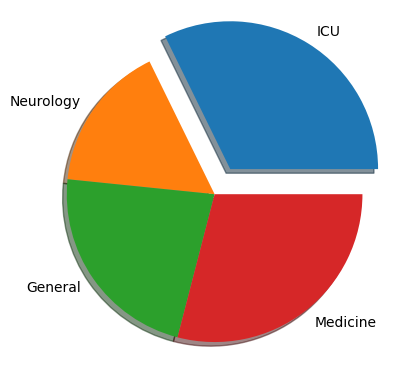

In [48]:
#Pie Chart with Services and explode the highest LOS
y = np.array([10,5,7,9])
myexplode=[0.2,0,0,0]
mylabels=["ICU", "Neurology", "General", "Medicine"]
#mycolors=["red","black","green","#4CAF50"]
plt.pie(y, labels=mylabels, explode=myexplode, shadow= True)
plt.show()

Question 33: Plot a graph to show the distribution of expected length of stay.

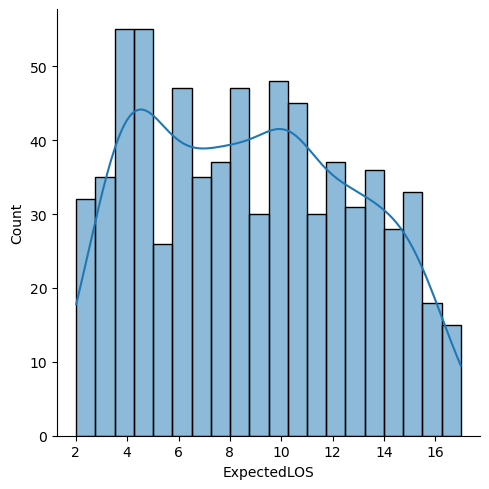

In [55]:
#Distribution Chart
sns.displot(df_D["ExpectedLOS"], kde="True", bins=20)
plt.show()

Q34: Create a WordCloud Chart with Reason For Visit.

## Q35: np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.

In [3]:
arr =np.arange(1,31)
newarr =arr.reshape(6,5)
sarr =(newarr[0:1 , 3:5])
sarr1 =(newarr[4:6 , 3:5])
sarr = np.where(sarr <6,-1, 99)
sarr1 = np.where(sarr1 <6,-1, 99)
print (sarr)
print (sarr1)

[[-1 -1]]
[[99 99]
 [99 99]]


## 36. Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [25]:
Patient_count = df_AV.loc[(df_AV['BloodPressureSystolic'] > 180 ) & (df_AV['BloodPressureDiastolic'] > 120)]
print(Patient_count['PatientMRN'].count())

101


In [87]:
tst= df_PA.loc[(df_PA['DateOfBirth'].dt.year) == 1986]
print(tst.FirstName+' '+tst.LastName)

23         Gabriel  Joseph
24         Lincoln  Brenda
29             Ala Halpert
72            Lolita Darci
164         Fadel Bernardt
238         Bentley Kippax
367            Vale Olanda
373          Britt Dureden
386       Cristabel Chatel
415       Constantia Group
452       Morgan Scrowston
561             Dom Baglow
568        Ignazio Melling
595         Homenick Rings
639           Hashim Slark
643       Ellie Ramsbotham
674        Llewellyn Group
714             Niles Shaw
733             Yvette Inc
777          Siouxie Group
852            Carly Group
868        Worth Pickering
877           Arni Baldack
909       Kuvalis Coupland
922    Rebbecca Rollingson
940            Wat Fideler
dtype: object


In [88]:
df_EDV[df_EDV.Acuity == 5].groupby(['ReasonForVisit'])['PatientID'].count()

ReasonForVisit
Accident               39
Car Accident           16
Chest Pain             61
Fever                  16
Gun Shot               16
Pneumonia              15
Shortness of Breath    46
Name: PatientID, dtype: int64